## Hypothesis testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- **Has the network latency gone up since we switched internet service providers?**

$H_0$: There is not relationship between the network speed and switching the internet service providers

$H_a$: The network speed decreased after switching internet service providers

*True negative:* There is no relationship between the internet service providers and network speed, and we don't switch provider back

*True positive:* The network speed decreased after switching internet providers and we returned to the previous provider

*Type I error (False positive):* The network speed didn't change but we thought different and returned to the old provider

*Type II error (False negative):* The network speed decreased but we didn't confirm it and stayed with the new internet service provider

In [1]:
#class solution

Variables: discrete and continuous. Testing difference

$H_0$: $\mu(latency_a) <= \mu(latency_b)$

$H_a$: $\mu(latance_a) > \mu(latency_b)$

*True positive:* latency went up and we said it went up

*True negative:* latency didn't go up and we said it didn't go up

*Type I (False positive):* latency didn't go up but we said it did

*Type II (False negative):* latency did go up, but we said it didn't

- **Is the website redesign any good?**

$H_0$: There is no difference between the time visitors spend on the site before and after the redesign

$H_a$: Visitors spend more time on the site after it was redesigned

*True negative:* There is no difference between site redesign and increasing of time spending on the site, updating of the site is not needed

*True positive:* There is a differerence between the redesign and the time visitors spend time on the site, we need to update

*Type I error (False positive):* There is no difference between site redesign and increasing of time spending on the site, but we thought differently and spent exra money on the site update

*Type II error (False negative):* There is a differerence between the redesign and the time visitors spend time on the site, but we didn't recognize it and missed the opportunity to update our site

In [ ]:
#class 

Variables discrete (old and new design) and conitnuos (time spent ob the web site)

$H_0$: time spent on the old site >= time spent on the new site

$H_a$: time spent on the old site < time spent on the new site

*TP:* Visiotrs spend more time on the new site and we said so

*TN:* Visitors spend less or equal time and we said 

*T1:* We said the site is better but it's not

*T2:* Time spent increased but we still concoder the redesign bad

- **Is our television ad driving more sales?**

$H_0$: The amount of sales didn't change since the beginning of tv marketing campaign 

$H_a$: There is an increase of sales since the beginning of tv marketing campaign 

*True negative:* The amount of sales didn't change since the beginning of tv marketing campaign and we don't continue this campaign

*True positive:* The amount of sales increased since the beginning of tv marketing campaign and we continue this campaign

*Type I error (False positive):* The amount of sales didn't change since the beginning of tv marketing campaign but we decided to continue this campaign

*Type II error (False negative):* The amount of sales increased since the beginning of tv marketing campaign but we cancel the campaign 

Discrete var (pre-ads), continuous var (sales)

$H_0$: avg pre-ad >= avg post-ad

$H_a$: avg pre-ad < avg post-ad

*TP:* sales increased after ad and we said that

*TN:* sales didn't

*T1:* sales didn't increase, but we said they did

*T2:* ads seem to work but we didn't think so

### Part 2 - Comparing means

1. **Answer with the type of test you would use (assume normal distribution):**

- Is there a difference in grades of students on the second floor compared to grades of all students?

*Two tailed one sample T-test ```scipy.stats.ttest_1samp```, check if* $p-value < \alpha$

- Are adults who drink milk taller than adults who dont drink milk?

*One tailed two sampled (or independent) T-test ```stats.ttest_ind```. Check if all assumptions met. In case we can not apply T-test, use Mann-Whitney U test ```stats.mannwhitneyu```*

- Is the the price of gas higher in texas or in new mexico?

*Same as above. One tailed two sampled (or independent) T-test ```stats.ttest_ind```. Preferable to use T-test and pass ```equal_var == False``` in case variances differ a lot.*

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

*If all assumptions met (independent samples, equal variances, normal distribution) we use ANOVA analysis ```stats.f_oneway```, otherwise Kruskall Wallis test ```stats.kruskal```*

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

2. **Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.**

$H_0$: there is no significant difference in the average time it takes for office 1 and office 2 to sell homes

$H_a$: there is a difference in the time it take to sell homes for office 1 and office 2

In [11]:
office1 = stats.norm(90, 15).rvs(40).astype(int)
office2 = stats.norm(100, 20).rvs(50).astype(int)

$H_0$: AVG time (office1) == AVG time (office2)

$H_a$: AVG time (office1) != AVG time (office2)

In [6]:
#significance level = 0.05

α = 0.05

In [ ]:
x = np.arange(50, 150)

y1 = stats.norm
plt.plot(x, 1)

Verify assumptions for 2-tailed independent T-test (indepent, normal). To verify that variances are equal run Levene test. Return the 2nd value, which is going to be p-value for variances. If the returned result > 0.05, we can assume that variances are equal:

In [19]:
stats.levene(office1, office2)[1]

0.18243347772960214

P-value for variances is 0.18 and it's bigger that 0.05, we can use paraetric T-test

In [69]:
#run the Independent T-test
t, p = stats.ttest_ind(office1, office2)
(t, p)

(-2.1038439883896936, 0.038245315037194326)

In [87]:
if p < α and t < 0:
    print('There is a difference in the time it takes to sell homes. It takes more time for office # 2')
elif p < α and t > 0:
    print('There is a difference in the time it takes to sell homes. It takes more time for office # 1')
else:
    print('There is no significant difference in the time it takes to sell homes between 2 offices. \
We fail to reject the Null Hypothesis.')

There is a difference in the time it takes to sell homes. It takes more time for office # 2


In [86]:
office1.mean() < office2.mean()

True

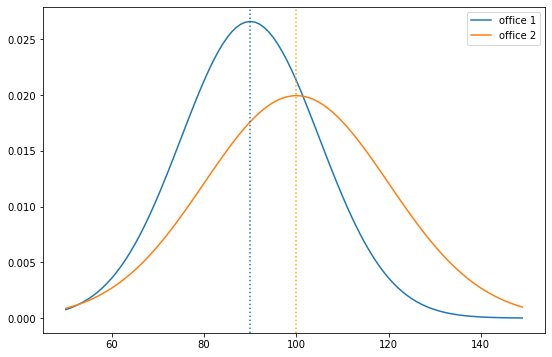

In [3]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()
plt.show()

In [10]:
#T-test using descriptive stats
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

if pval < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, \
indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


2. **Load the mpg dataset and use it to answer the following questions:**

In [11]:
mpg = data('mpg')

In [12]:
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

 Two tailed, two sampled.
 
 $H_0$: fuel_eff(1999) == fuel_eff(2008), there is no difference in fuel efficience in cars from 2008 vs 1999
 
 $H_a$: fuel_eff(1999) != fuel_eff(2008, there is no difference in fuel efficience in cars from 2008 vs 1999

Harmonic mean

$2 / (1/cty + 1/hwy)$

In [13]:
#harmonic mean
mpg['fuel_eff'] =  round(2 / ((1/mpg.hwy) + (1/mpg.cty)), 2)
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class  \
1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

   fuel_eff  
1     22.21  
2     24.36  
3     24.31  
4     24.71  
5     19.81

In [14]:
models1999 = mpg[mpg.year == 1999].fuel_eff

In [44]:
models1999.head()

1    22.21
2    24.36
5    19.81
6    21.27
8    21.27
Name: fuel_eff, dtype: float64

In [15]:
models2008 = mpg[mpg.year == 2008].fuel_eff

In [52]:
#check if variances are equal
stats.levene(models1999, models2008)[1] 
#p-value is 0.86, we can consider variances eual and use ind. T-tes

0.8604763910415811

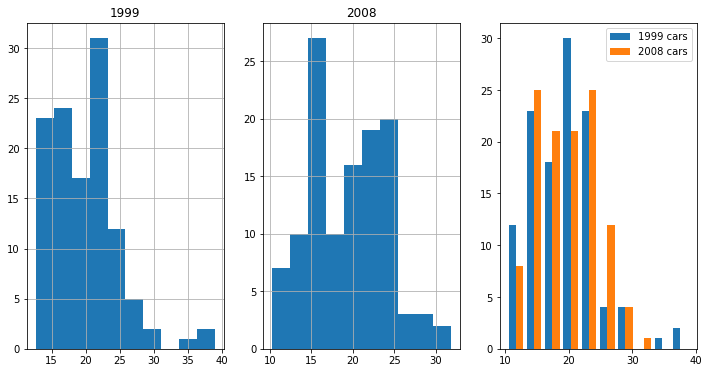

In [21]:
plt.figure(figsize = (12, 6))

plt.subplot(131)
models1999.hist()
plt.title('1999')

plt.subplot(132)
models2008.hist()
plt.title('2008')

plt.subplot(133)
plt.hist([models1999, models2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

plt.show()

$H_0$: models1999 == models2008

$H_a$: models1999 != models2008

In [73]:
t1, p1 = stats.ttest_ind(models1999, models2008)
(t1, p1)

(0.29976841281243016, 0.7646222117552022)

In [96]:
models1999.mean(), models2008.mean()

(19.681452991452982, 19.488632478632482)

In [75]:
if p1 / 2 < α and t1 > 0:
    print('Cars from 1999 are more fuel efficient')
if p1 / 2 < α and t1 < 0:
    print('Cars from 2008 were more fuel efficient')

else:
    print('There is no significant difference in the fuel efficiency between cars from 1999 and cars from 2008')

There is no significant difference in the fuel efficiency between cars from 1999 and cars from 2008


- Are compact cars more fuel-efficient than the average car?

$H_0$: compact eff <= avg eff

$H_a$: compact eff > avg eff

One tailed, 1 sampled t-test

In [22]:
total_mean = round(mpg.fuel_eff.mean(), 2)
total_mean

19.59

In [24]:
compact_cars = mpg[mpg['class'] == 'compact'].fuel_eff
compact_cars.head()

1    22.21
2    24.36
3    24.31
4    24.71
5    19.81
Name: fuel_eff, dtype: float64

In [25]:
compact_cars.mean()

23.500212765957446

In [26]:
compact_cars.count() #sample size is big enough

47

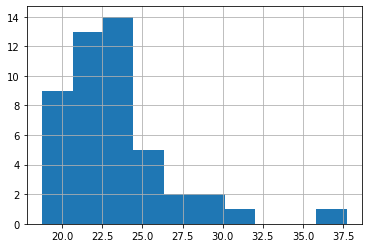

In [27]:
compact_cars.hist();

In [62]:
tcompact, pcompact = stats.ttest_1samp(compact_cars, total_mean)
(tcompact, pcompact)

(7.5022246266558446, 1.6170060887332524e-09)

In [95]:
# We use one tailed test, p-value / 2 < alpha
if pcompact/ 2 < α and tcompact < 0:
    print('Compact cares are less fuel efficient')
if pcompact/ 2 < α and tcompact > 0:
    print('Compact cares are more fuel efficient')
else:
    print('There is no significant difference in the fuel efficiency between compact cars and other cars')

Compact cares are more fuel efficient


- Do manual cars get better gas mileage than automatic cars?

$H_0$: fuel_eff(manual) <= fuel_eff(auto)

$H_a$: fuel_eff(manual) > fuel_eff(auto)

*One tailed, 2 sampled*

In [28]:
manual = mpg[mpg.trans.str.contains('manual')].fuel_eff

In [29]:
auto = mpg[mpg.trans.str.contains('auto')].fuel_eff

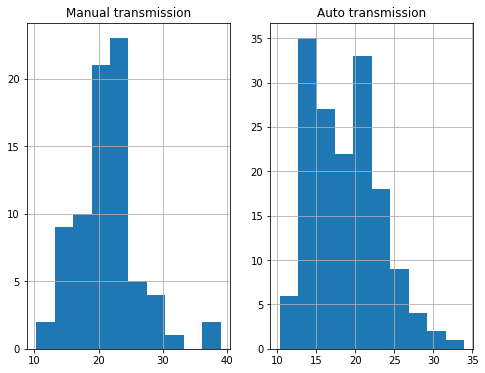

In [30]:
plt.figure(figsize = (8, 6))

plt.subplot(121)
manual.hist()
plt.title('Manual transmission')

plt.subplot(122)
auto.hist()
plt.title('Auto transmission')

plt.show()

In [81]:
stats.levene(manual, auto)[1] # p-value > alpha, variances are ok

0.9068872019462125

In [82]:
ttrans, ptrans = stats.ttest_ind(manual, auto)
(ttrans, ptrans)

(4.652099934834949, 5.522151036980458e-06)

In [83]:
if ptrans / 2 < α and ttrans > 0:
    print('The manual cars get better gas mileage')
else:
    print('There is no difference')

The manual cars get better gas mileage


### Part 3 - Correlation 

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot? - *Pearson R test*

- Do guys and gals quit their jobs at the same rate? - *2 sample 2 tail T test*

- Does the length of time of the lecture correlate with a students grade? - *Pearson R*

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

2. Use the telco_churn data.

In [90]:
url = get_db_url('telco_churn')
sql = '''
SELECT c.tenure, c.monthly_charges, c.total_charges, c. phone_service, ist.internet_service_type
FROM customers c
JOIN internet_service_types ist USING (internet_service_type_id)
WHERE tenure != 0;
'''

In [91]:
telco_df = pd.read_sql(sql, url)

In [92]:
telco_df.head()

tenure  monthly_charges total_charges phone_service internet_service_type
0       9             65.6         593.3           Yes                   DSL
1       9             59.9         542.4           Yes                   DSL
2       4             73.9        280.85           Yes           Fiber optic
3      13             98.0       1237.85           Yes           Fiber optic
4       3             83.9         267.4           Yes           Fiber optic

In [123]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7032 non-null   int64  
 1   monthly_charges        7032 non-null   float64
 2   total_charges          7032 non-null   object 
 3   phone_service          7032 non-null   object 
 4   internet_service_type  7032 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 274.8+ KB


In [120]:
# convert string to float
telco_df['total_charges'] = telco_df.total_charges.astype(float)

In [126]:
telco_df.head(2)

tenure  monthly_charges  total_charges phone_service internet_service_type
0       9             65.6          593.3           Yes                   DSL
1       9             59.9          542.4           Yes                   DSL

In [125]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7032 non-null   int64  
 1   monthly_charges        7032 non-null   float64
 2   total_charges          7032 non-null   float64
 3   phone_service          7032 non-null   object 
 4   internet_service_type  7032 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 274.8+ KB


In [139]:
telco_df.describe()

tenure  monthly_charges  total_charges
count  7032.000000      7032.000000    7032.000000
mean     32.421786        64.798208    2283.300441
std      24.545260        30.085974    2266.771362
min       1.000000        18.250000      18.800000
25%       9.000000        35.587500     401.450000
50%      29.000000        70.350000    1397.475000
75%      55.000000        89.862500    3794.737500
max      72.000000       118.750000    8684.800000

- Does tenure correlate with monthly charges?

$H_0$: There is no **linear** relationship between monthly charges and tenure

$H_a$: There is a **linear** relationship between monthly charges and tenure

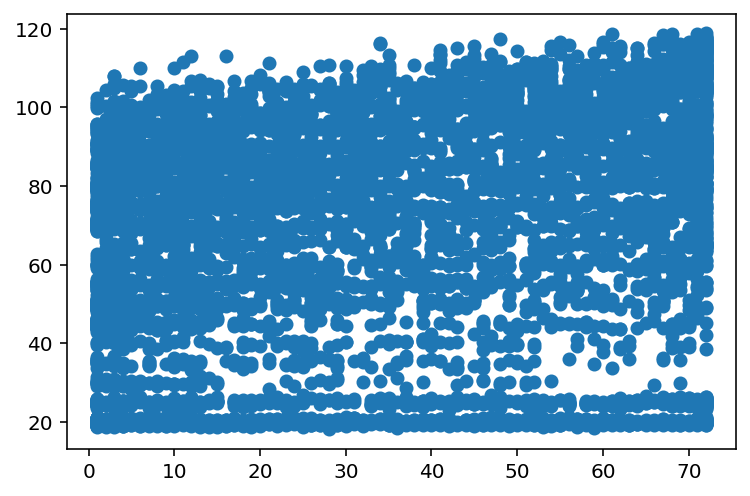

In [127]:
plt.scatter(telco_df.tenure, telco_df.monthly_charges)

In [93]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

In [ ]:
#There is a weak relation between tenure and monthly charges. Reject the null hypothesis

In [94]:
if p < 0.05:
    print('reject the null hypothesis')

reject the null hypothesis


- Total charges?

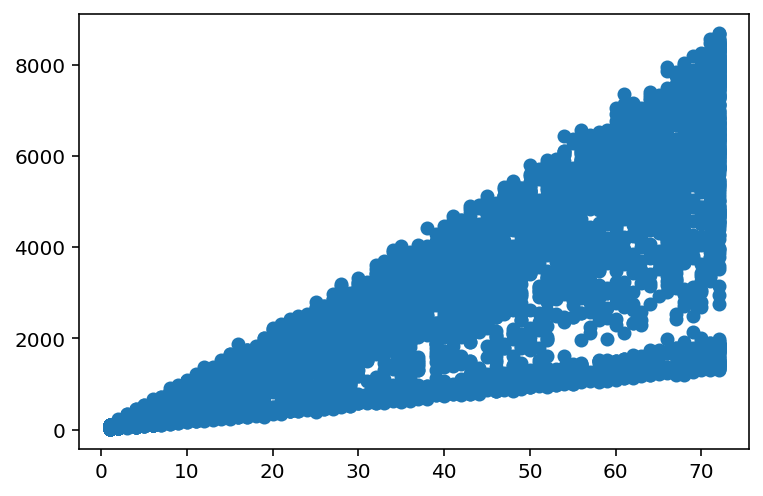

In [129]:
plt.scatter(telco_df.tenure, telco_df.total_charges)

In [130]:
stats.pearsonr(telco_df.tenure, telco_df.total_charges) # strong relation, it does correlate

(0.825880460933202, 0.0)

- What happens if you control for phone and internet service?

In [134]:
telco_df.head(2)

tenure  monthly_charges  total_charges phone_service internet_service_type
0       9             65.6          593.3           Yes                   DSL
1       9             59.9          542.4           Yes                   DSL

In [142]:
phone_yes = telco_df[telco_df.phone_service == 'Yes'].tenure

In [144]:
phone_no = telco_df[telco_df.phone_service == 'No'].tenure

In [ ]:
#2 sample, 2 tailed T-test. check for p < alpha
#sample size is big, we can assume normaility

$H_0$: there is no difference in tenure length between those who has service and who don't

$H_a$: there is difference in tenure length between those who has service and who don't

In [145]:
stats.levene(phone_yes, phone_no) #we can assume that there is small difference in variances and run the test

LeveneResult(statistic=0.7120196939154351, pvalue=0.3988028480645335)

In [150]:
if(stats.ttest_ind(phone_yes, phone_no)[1] < α):
    print('''
    Reject Null Hypothesis 
    There is a difference in tenure length between those who has service and who don\'t
    ''')
else:
    print('''
    Fail to reject Null Hypothesis  \n
    There is no difference in tenure length between those who has service and who don't
    ''')


    Fail to reject Null Hypothesis  

    There is no difference in tenure length between those who has service and who don't
    


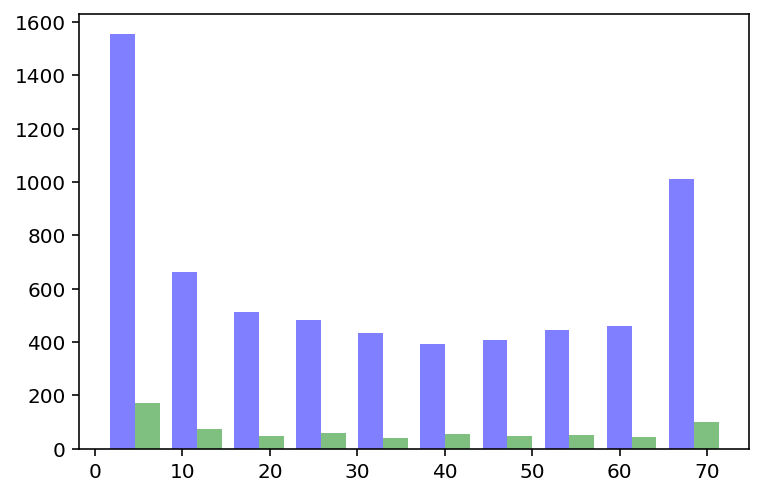

In [162]:
plt.hist([phone_yes, phone_no], color = ['blue', 'green'], alpha = 0.5);

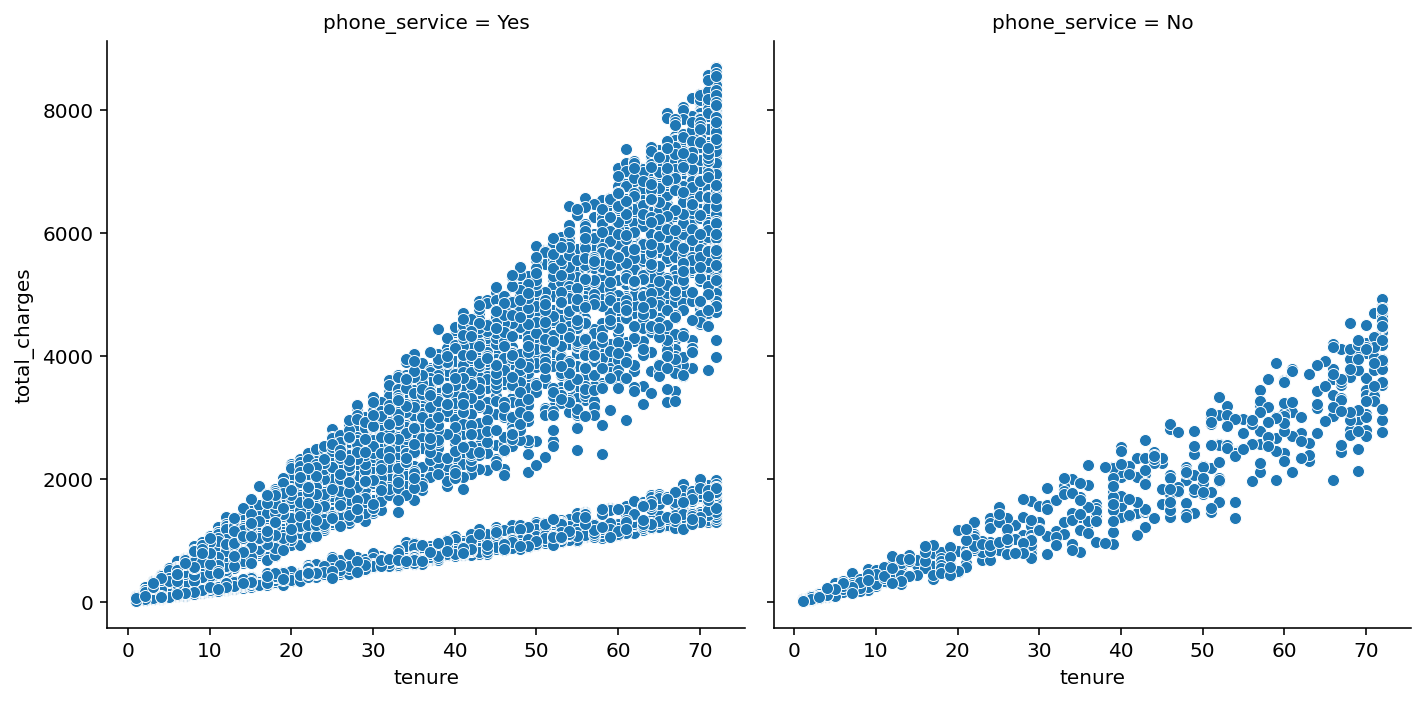

In [177]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='phone_service');

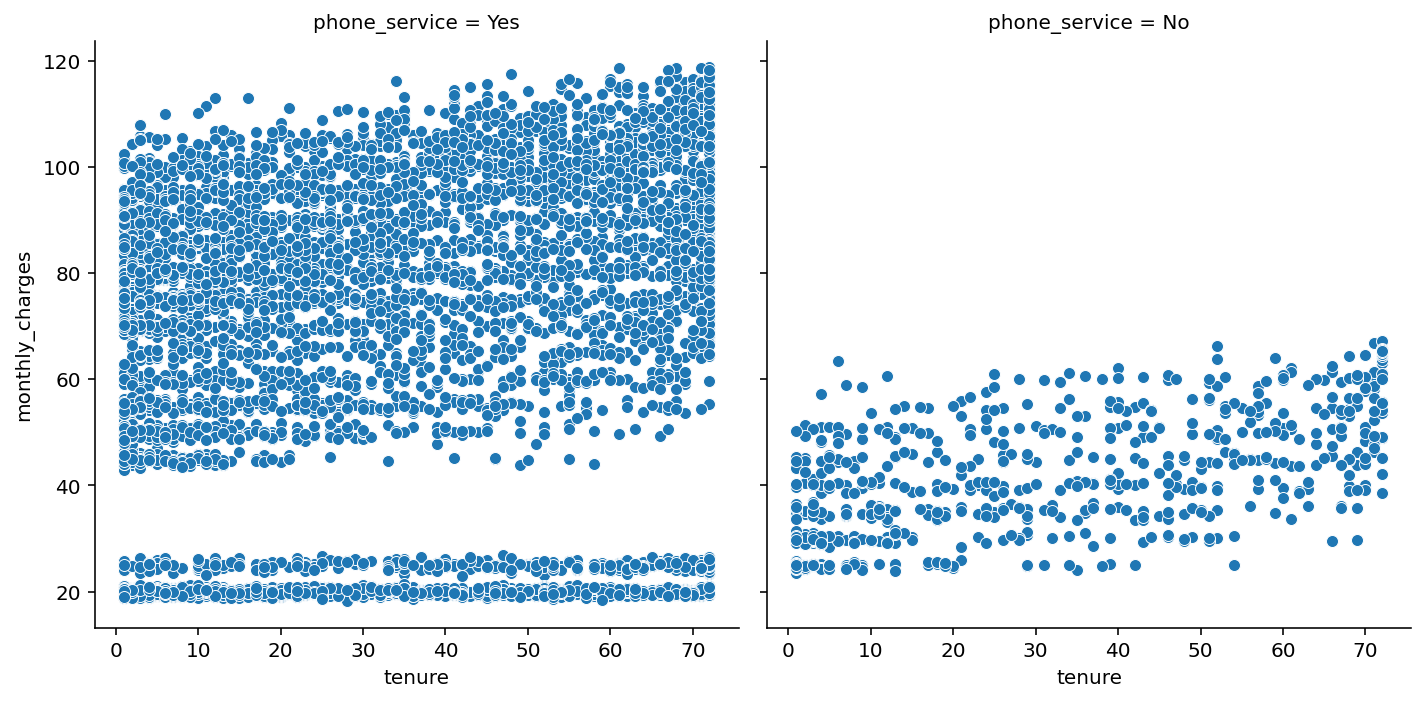

In [178]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='phone_service');

We can see on the visualizations that there is a strong relationship between total charges and tenure in both cases: with phone service and without phone service. Let's confirm it with Pearson R Test.

In [180]:
phone_serv = telco_df[telco_df.phone_service == 'Yes']
no_phone_serv = telco_df[telco_df.phone_service == 'No']

In [182]:
stats.pearsonr(phone_serv.tenure, phone_serv.total_charges) #0.82

(0.829839321069941, 0.0)

In [185]:
stats.pearsonr(no_phone_serv.tenure, no_phone_serv.total_charges) #0.95

(0.9534228506954516, 0.0)

In [183]:
stats.pearsonr(phone_serv.tenure, phone_serv.monthly_charges) #0.24

(0.24419396575193233, 6.82801603762022e-87)

In [186]:
stats.pearsonr(no_phone_serv.tenure, no_phone_serv.monthly_charges) #0.59

(0.5924298640568983, 1.1732739032891168e-65)

Control for Internet Service

In [164]:
#internet service
telco_df.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

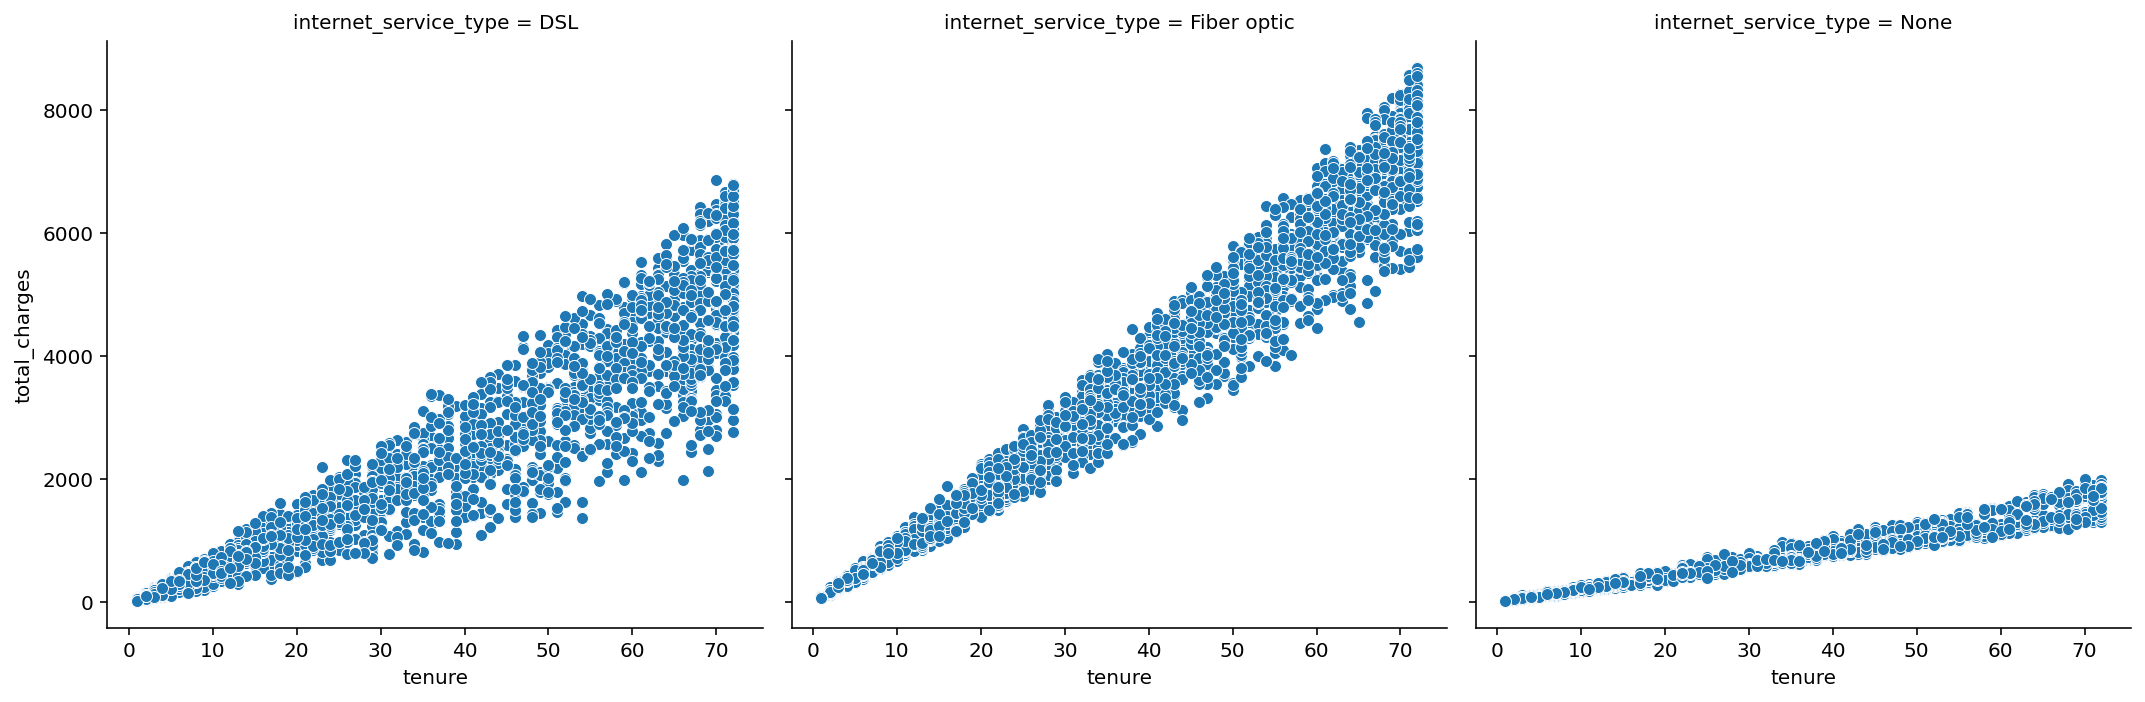

In [187]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='internet_service_type');

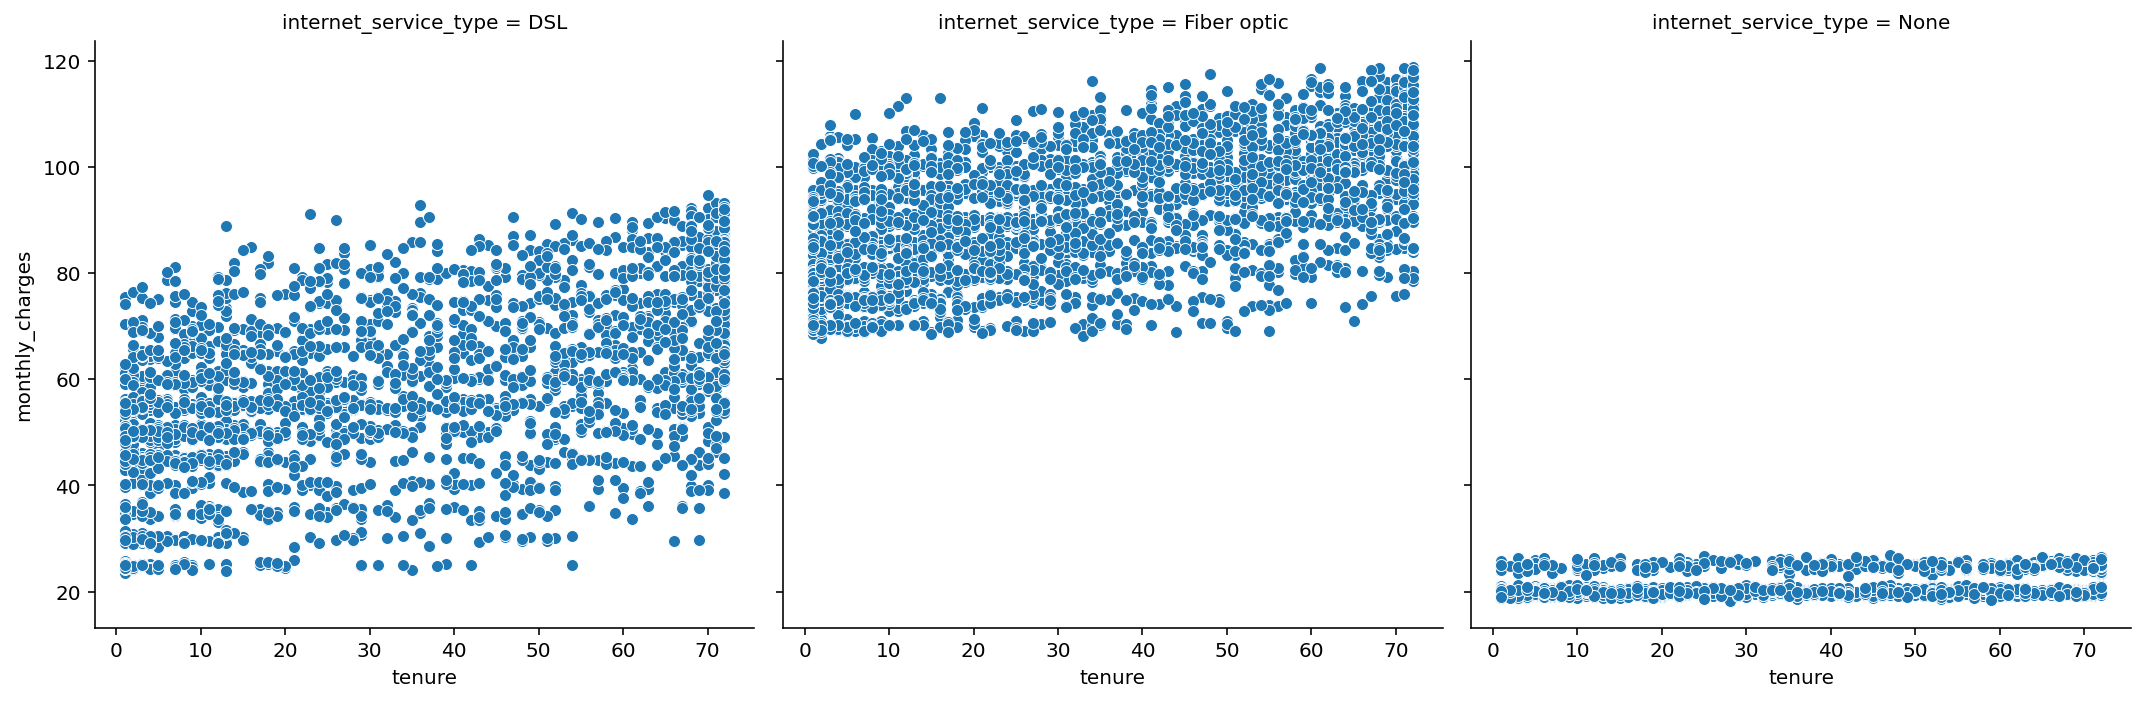

In [188]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='internet_service_type');

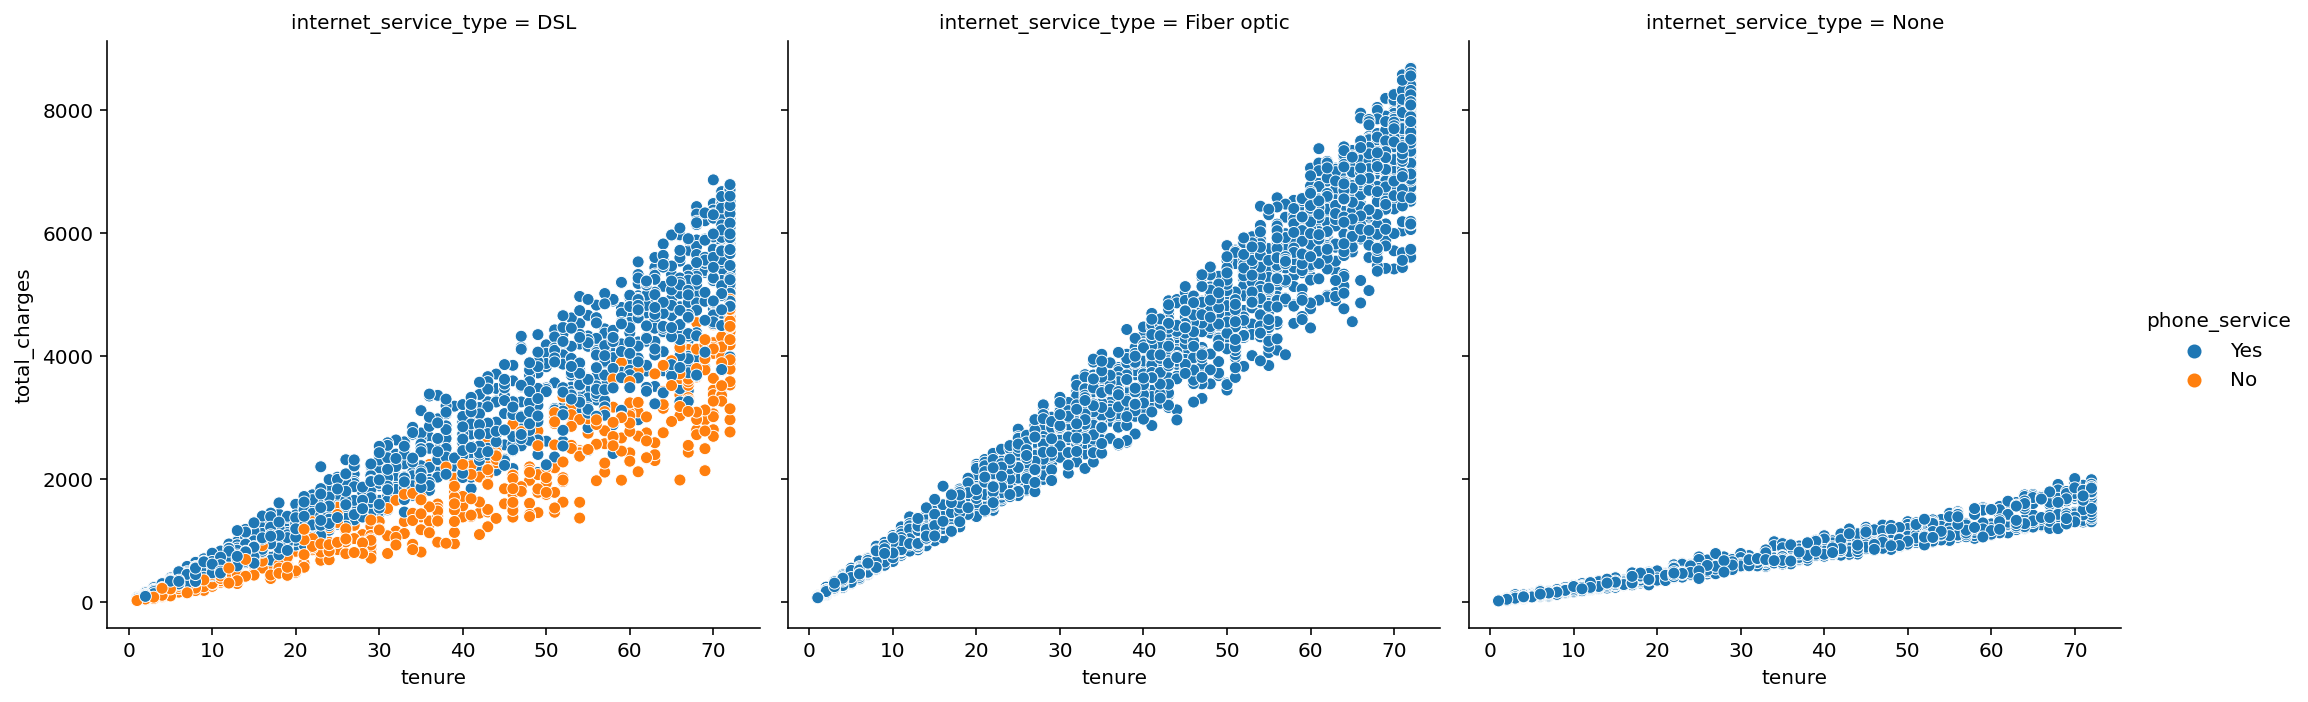

In [190]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='internet_service_type', hue = 'phone_service');

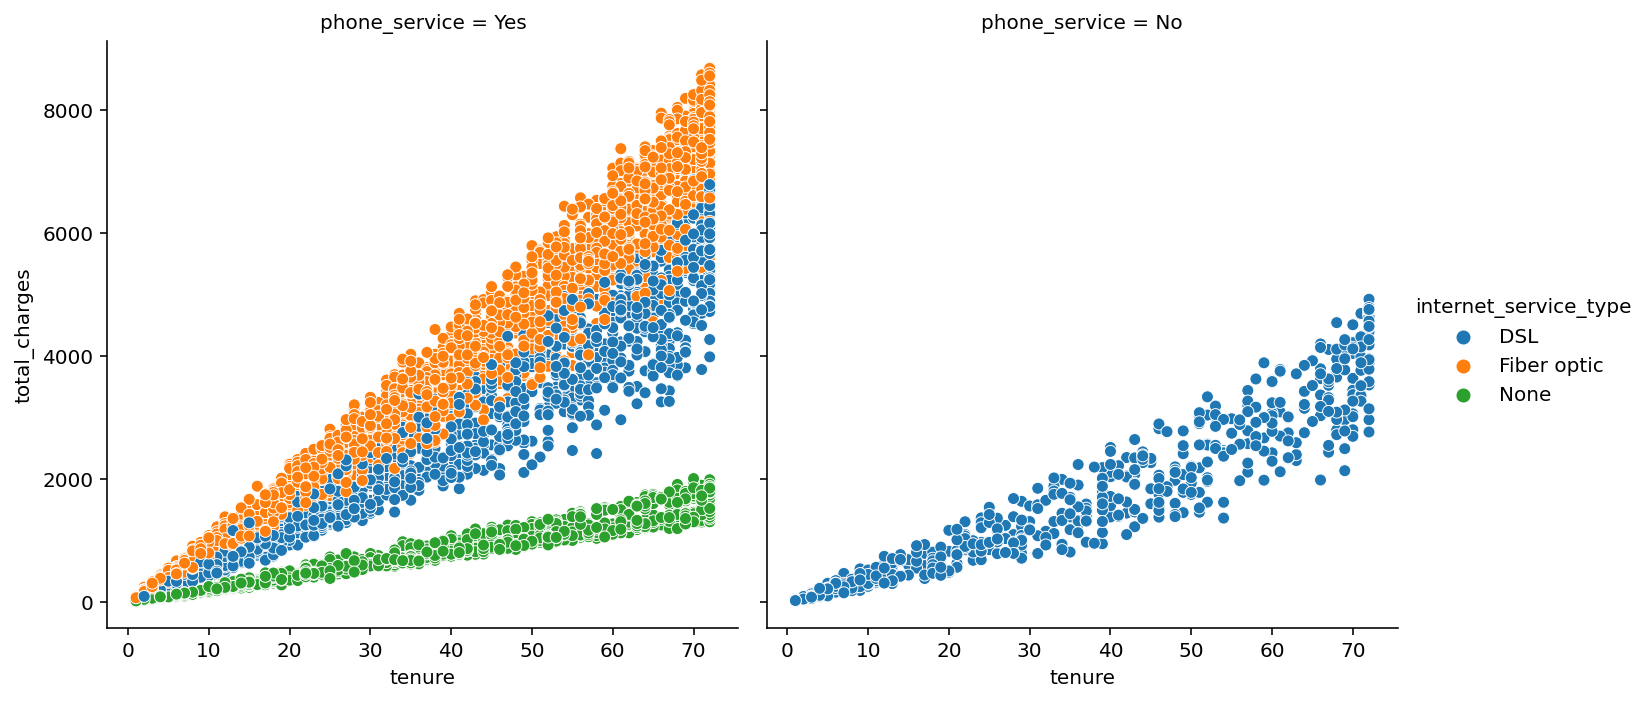

In [191]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='phone_service', hue = 'internet_service_type');

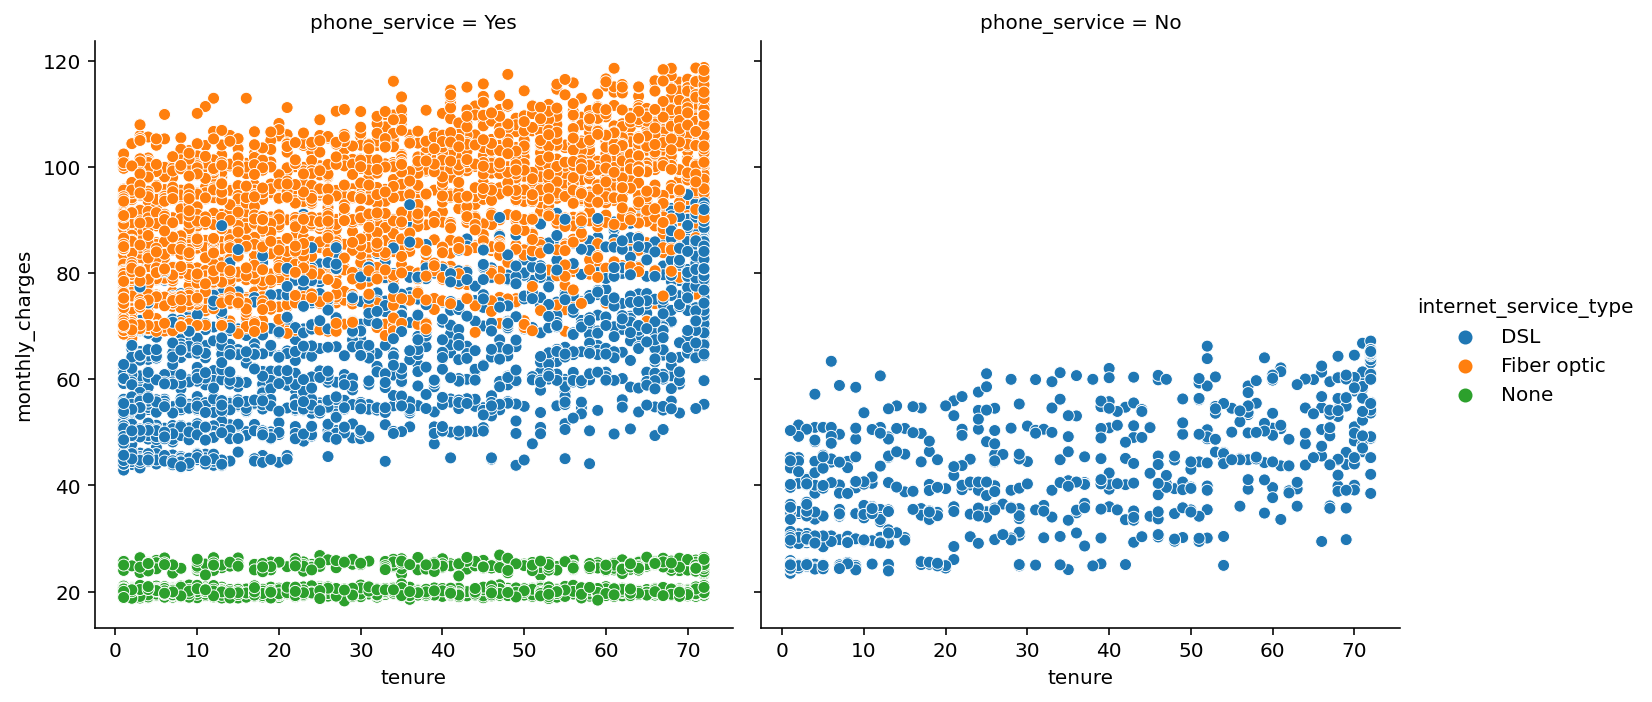

In [192]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='phone_service', hue = 'internet_service_type');

In [195]:
dsl = telco_df[telco_df.internet_service_type == 'DSL']

In [196]:
fiber = telco_df[telco_df.internet_service_type == 'Fiber optic']

In [199]:
no_internet = telco_df[telco_df.internet_service_type == 'None']

In [225]:
dsl.corr()

tenure  monthly_charges  total_charges
tenure           1.000000         0.519701       0.941185
monthly_charges  0.519701         1.000000       0.717891
total_charges    0.941185         0.717891       1.000000

In [226]:
fiber.corr()

tenure  monthly_charges  total_charges
tenure           1.000000         0.624621       0.985309
monthly_charges  0.624621         1.000000       0.713525
total_charges    0.985309         0.713525       1.000000

In [227]:
no_internet.corr()

tenure  monthly_charges  total_charges
tenure           1.000000         0.346188       0.981465
monthly_charges  0.346188         1.000000       0.484485
total_charges    0.981465         0.484485       1.000000

In [228]:
stats.pearsonr(dsl.total_charges, dsl.tenure)

(0.9411848215629786, 0.0)

In [229]:
stats.pearsonr(fiber.total_charges, fiber.tenure)

(0.9853093528070602, 0.0)

In [230]:
stats.pearsonr(no_internet.total_charges, no_internet.tenure)

(0.9814648859044287, 0.0)

In [233]:
stats.pearsonr(dsl.monthly_charges, dsl.tenure)

(0.5197012004433111, 2.8895185791364017e-167)

In [232]:
stats.pearsonr(fiber.monthly_charges, fiber.tenure)

(0.6246206176175583, 0.0)

In [231]:
stats.pearsonr(no_internet.monthly_charges, no_internet.tenure)

(0.34618773548574655, 4.896604599951957e-44)

## Class solution

In [99]:
def corr_tenure_and_monthly(df):
    # returns the results of a pearson's r corr test run on the dataframe
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges) , index = ['r', 'p'])

In [100]:
# Do stuff faster with this ONE TRICK stakeholders hate!
# Groupby your control group(s)
# Apply the function that runs your stats test
telco_df.groupby(['internet_service_type', 'phone_service']).apply(corr_tenure_and_monthly)

r              p
internet_service_type phone_service                         
DSL                   No             0.592430   1.173274e-65
                      Yes            0.658094  5.781402e-216
Fiber optic           Yes            0.624621   0.000000e+00
None                  Yes            0.346188   4.896605e-44

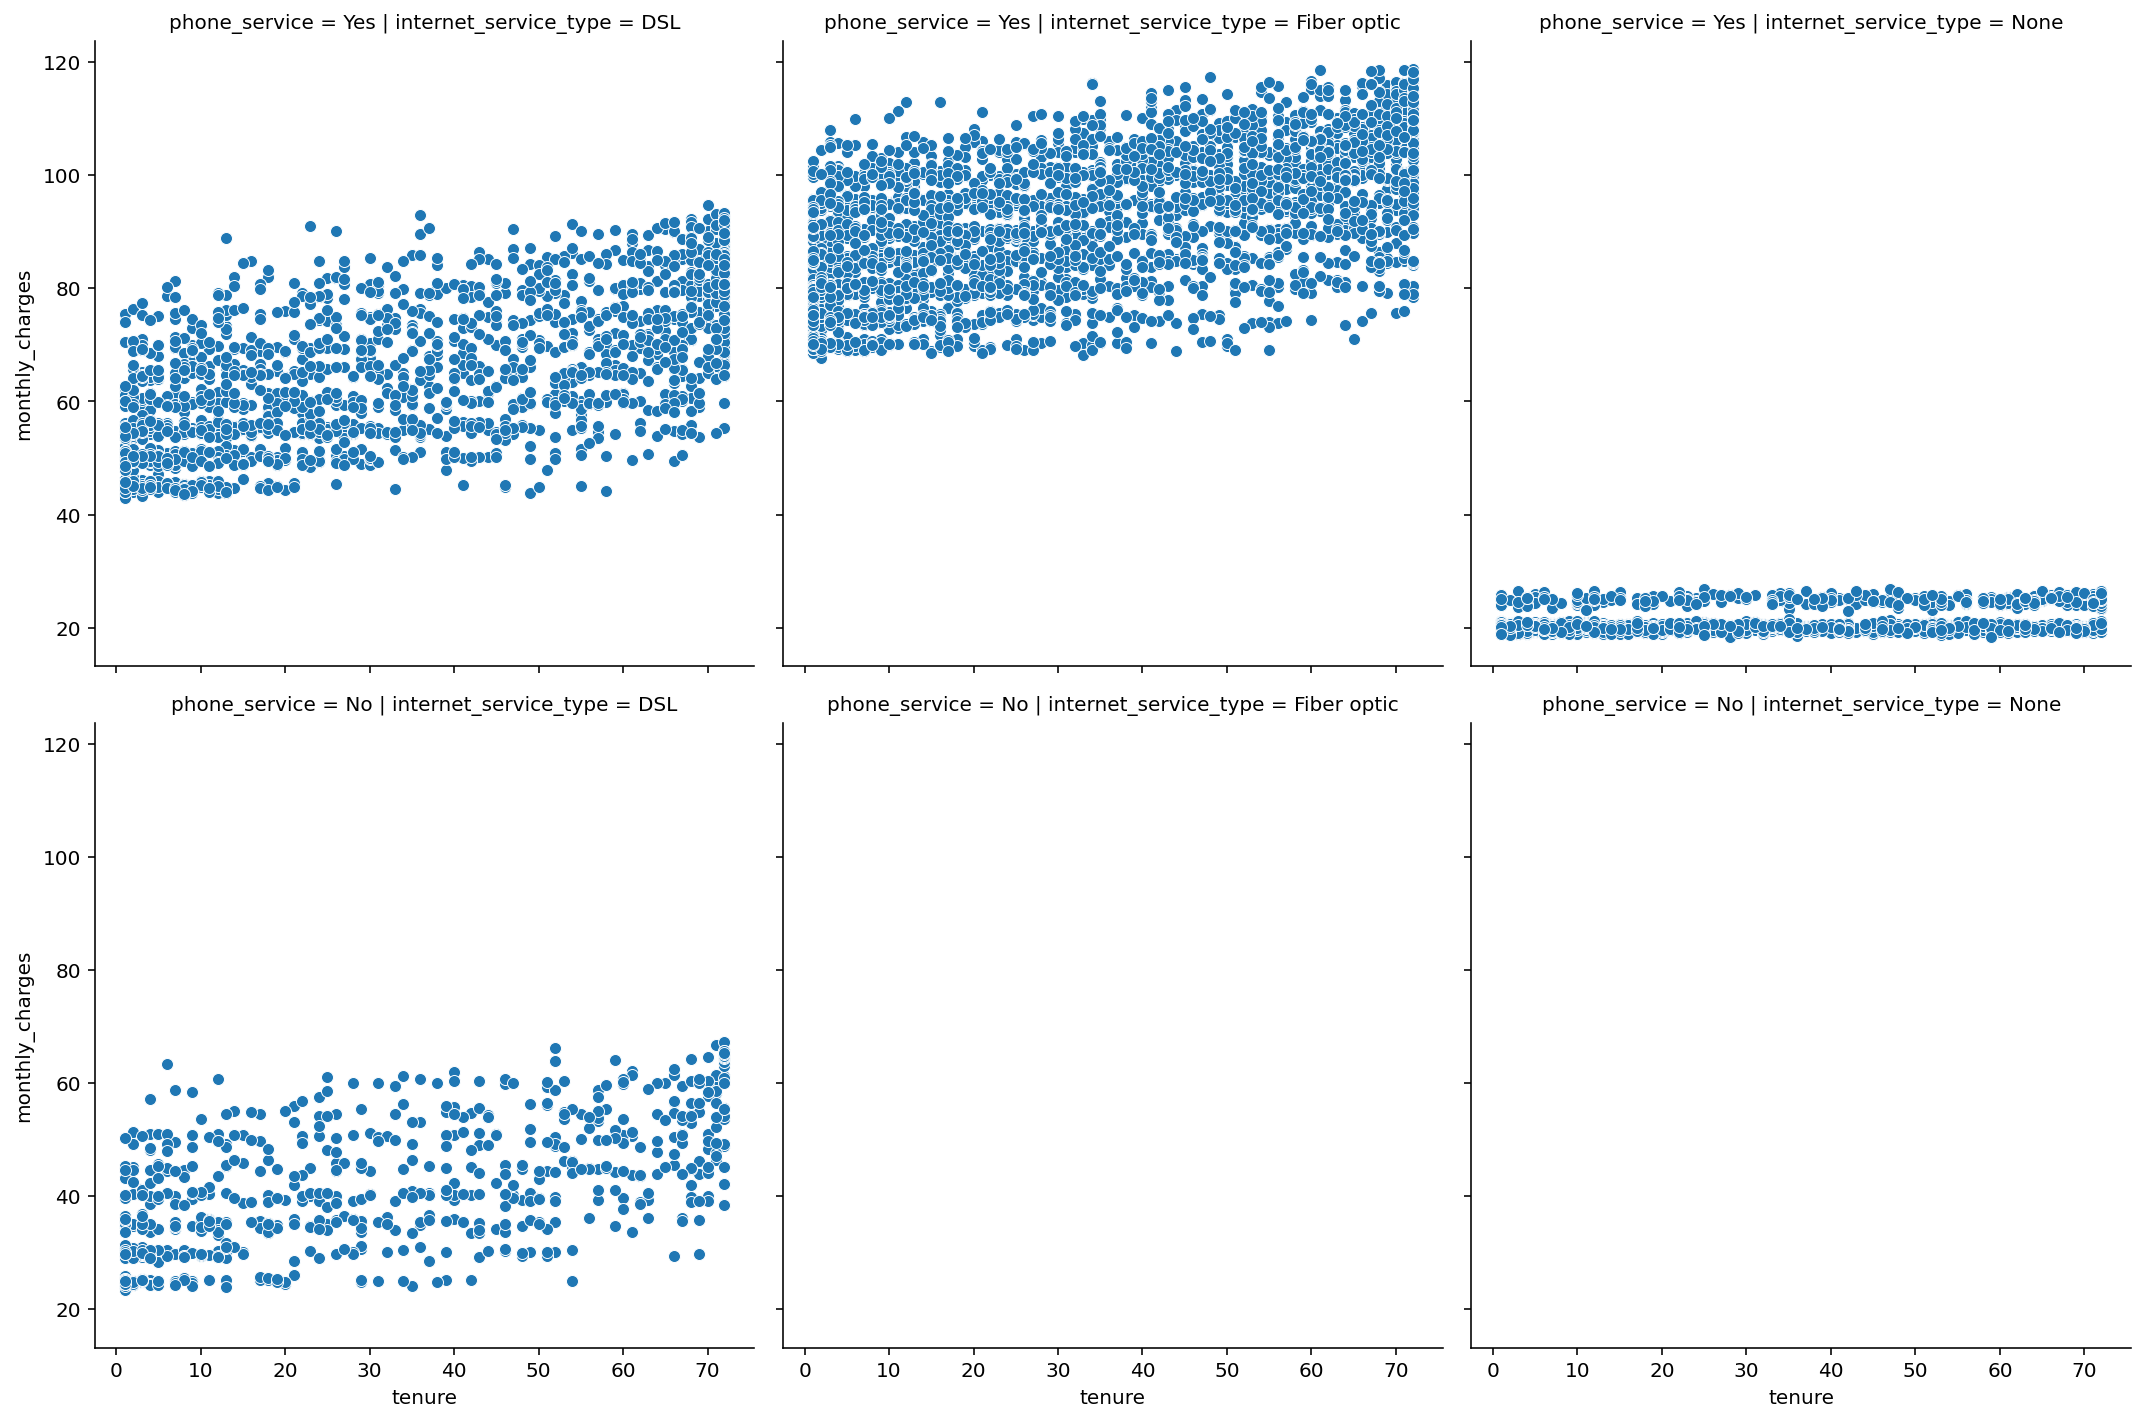

In [108]:
#visualizations
sns.relplot(data = telco_df, x = 'tenure', y = 'monthly_charges', col = 'internet_service_type', 
            row = 'phone_service')

In [121]:
def corr_tenure_and_total(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges) , index = ['r', 'p'])

In [122]:
telco_df.groupby(['internet_service_type', 'phone_service']).apply(corr_tenure_and_total)

r    p
internet_service_type phone_service               
DSL                   No             0.953423  0.0
                      Yes            0.970533  0.0
Fiber optic           Yes            0.985309  0.0
None                  Yes            0.981465  0.0

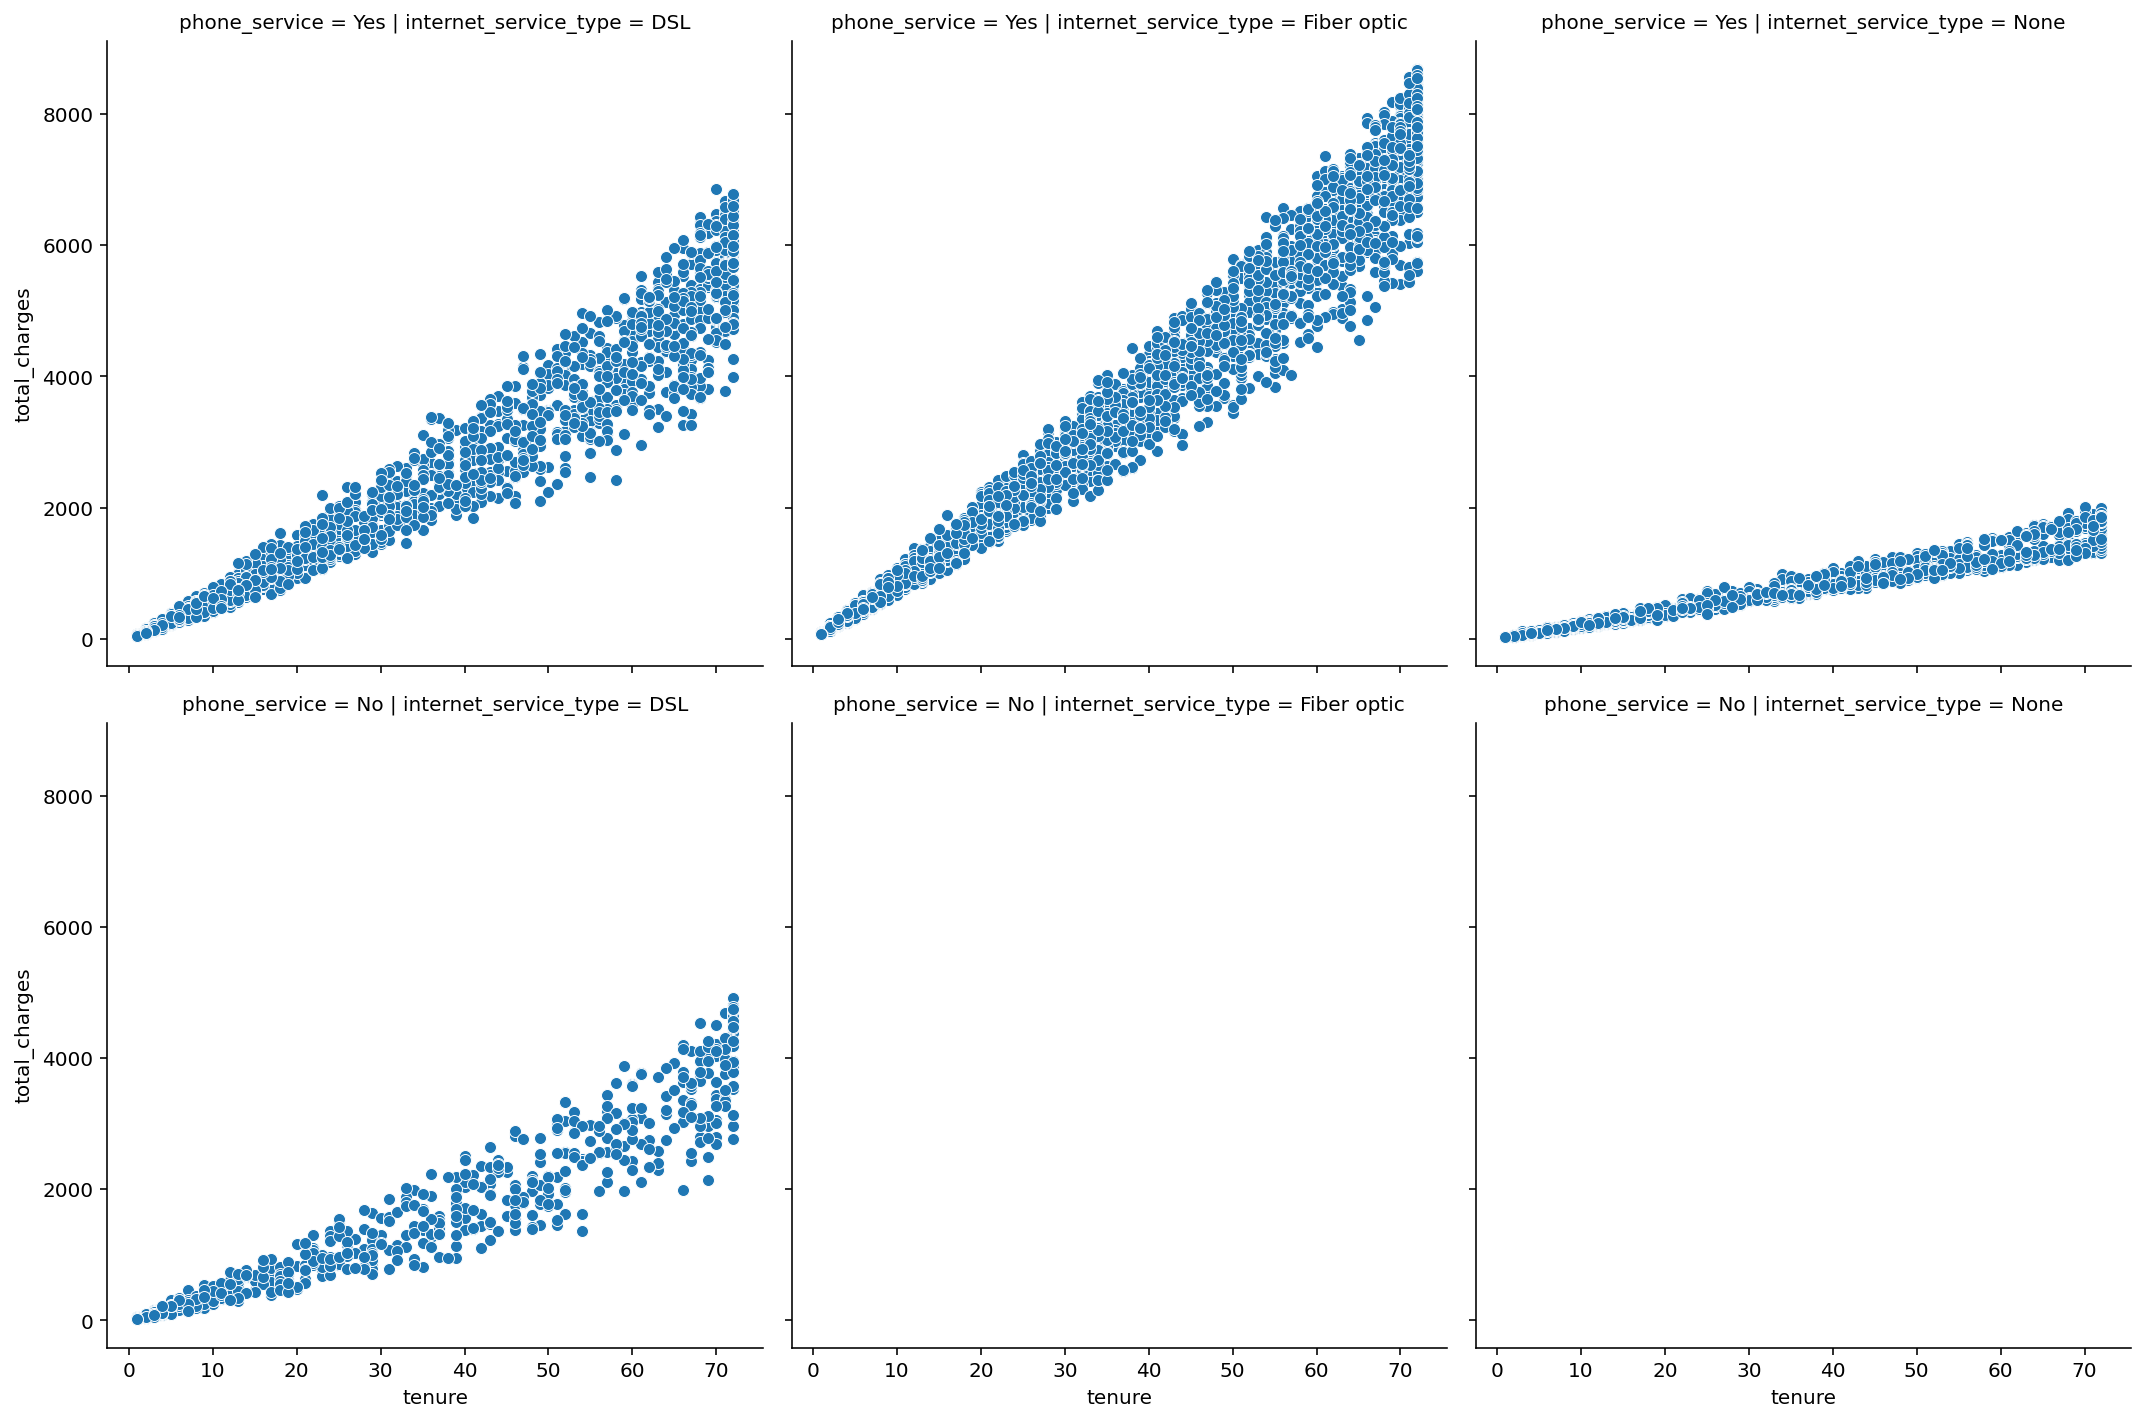

In [124]:
#visualizations
sns.relplot(data = telco_df, x = 'tenure', y = 'total_charges', col = 'internet_service_type', 
            row = 'phone_service');

3. Use the employees database.

In [16]:
empl_url = get_db_url('employees')

sql_salaries = '''
SELECT e.emp_no, e.hire_date, AVG(s.salary) as avg_salary, MAX(s.to_date) as max_date
FROM employees e
JOIN salaries s USING(emp_no)
GROUP BY e.emp_no;
'''

sql_titles = '''
SELECT e.emp_no, e.hire_date, COUNT(t.title) as count_titles, MAX(t.to_date) as max_date
FROM employees e
JOIN titles t USING(emp_no)
GROUP BY e.emp_no;
'''

In [17]:
emp_salaries = pd.read_sql(sql_salaries, empl_url)

In [18]:
emp_titles = pd.read_sql( sql_titles, empl_url)

In [20]:
emp_salaries.describe()

emp_no     avg_salary
count  300024.000000  300024.000000
mean   253321.763392   61451.787823
std    161828.235540   15244.082250
min     10001.000000   39299.500000
25%     85006.750000   49641.659125
50%    249987.500000   57839.923300
75%    424993.250000   70701.850000
max    499999.000000  141835.333300

In [ ]:
emp_salaries.info()

In [19]:
emp_titles.describe()

emp_no   count_titles
count  300024.000000  300024.000000
mean   253321.763392       1.477575
std    161828.235540       0.519220
min     10001.000000       1.000000
25%     85006.750000       1.000000
50%    249987.500000       1.000000
75%    424993.250000       2.000000
max    499999.000000       3.000000

In [21]:
emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   emp_no        300024 non-null  int64 
 1   hire_date     300024 non-null  object
 2   count_titles  300024 non-null  int64 
 3   max_date      300024 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.2+ MB


In [22]:
emp_salaries.head()

emp_no   hire_date  avg_salary    max_date
0   10001  1986-06-26  75388.9412  9999-01-01
1   10002  1985-11-21  68854.5000  9999-01-01
2   10003  1986-08-28  43030.2857  9999-01-01
3   10004  1986-12-01  56512.2500  9999-01-01
4   10005  1989-09-12  87275.7692  9999-01-01

In [23]:
emp_titles.head()

emp_no   hire_date  count_titles    max_date
0   10001  1986-06-26             1  9999-01-01
1   10002  1985-11-21             1  9999-01-01
2   10003  1986-08-28             1  9999-01-01
3   10004  1986-12-01             2  9999-01-01
4   10005  1989-09-12             2  9999-01-01

- Is there a relationship between how long an employee has been with the company and their salary?

In [24]:
import datetime as dt

In [25]:
unique_dates = emp_salaries.max_date.sort_values(ascending=False).unique()

In [27]:
unique_dates[:5]

array([datetime.date(9999, 1, 1), datetime.date(2002, 8, 1),
       datetime.date(2002, 7, 31), datetime.date(2002, 7, 30),
       datetime.date(2002, 7, 29)], dtype=object)

In [73]:
to_date = unique_dates[0]
max_date = unique_dates[1]
set_date = max_date + dt.timedelta(days = 370)

In [74]:
#in the database change the to_date from 9999 to Aug, 2, 2002
emp_salaries['max_date'] = np.where(emp_salaries.max_date == to_date, 
                             set_date, emp_salaries.max_date)

In [75]:
emp_salaries.head()

emp_no   hire_date  avg_salary    max_date  days_worked days_worked_text
0   10001  1986-06-26  75388.9412  2003-08-01         6245        6245 days
1   10002  1985-11-21  68854.5000  2003-08-01         6462        6462 days
2   10003  1986-08-28  43030.2857  2003-08-01         6182        6182 days
3   10004  1986-12-01  56512.2500  2003-08-01         6087        6087 days
4   10005  1989-09-12  87275.7692  2003-08-01         5071        5071 days

In [76]:
emp_salaries['days_worked_text'] = (emp_salaries.max_date - emp_salaries.hire_date).astype(str)
emp_salaries['days_worked'] = emp_salaries.days_worked_text.str.replace(' days', '').astype(int)
emp_salaries.head()

emp_no   hire_date  avg_salary    max_date  days_worked days_worked_text
0   10001  1986-06-26  75388.9412  2003-08-01         6245        6245 days
1   10002  1985-11-21  68854.5000  2003-08-01         6462        6462 days
2   10003  1986-08-28  43030.2857  2003-08-01         6182        6182 days
3   10004  1986-12-01  56512.2500  2003-08-01         6087        6087 days
4   10005  1989-09-12  87275.7692  2003-08-01         5071        5071 days

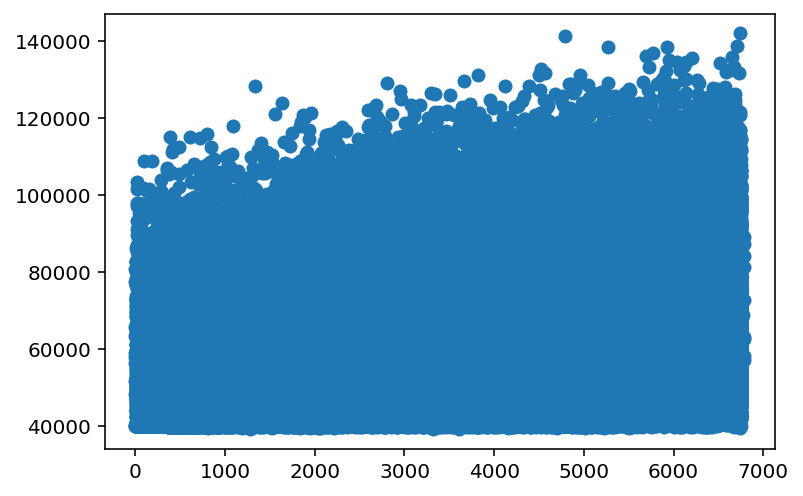

In [50]:
plt.scatter(y = emp_salaries.avg_salary, x = emp_salaries.days_worked)

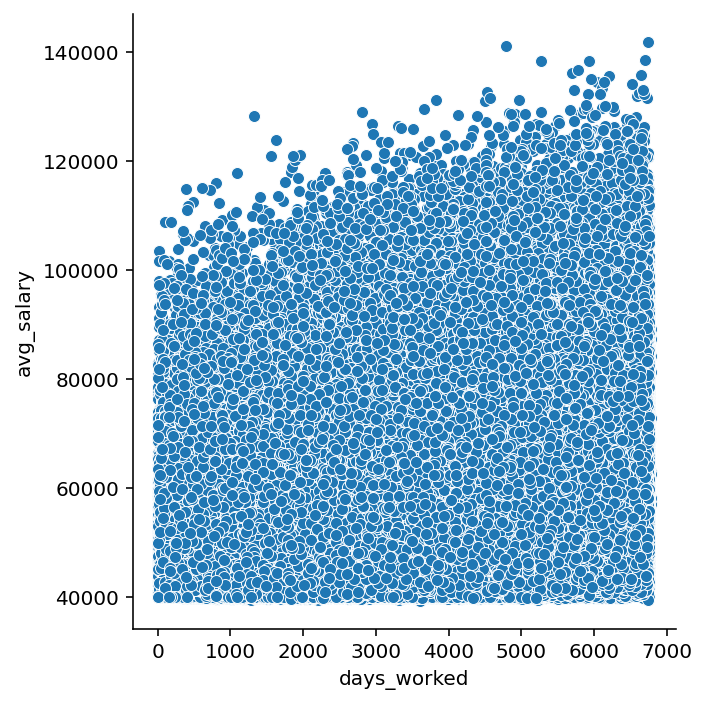

In [127]:
sns.relplot(data = emp_salaries, y = 'avg_salary', x = 'days_worked');

In [77]:
#run the Pearson R test to find if there is a correlation between a salary and how long emp worked
stats.pearsonr(emp_salaries.avg_salary, emp_salaries.days_worked)

(0.2170006200499887, 0.0)

There is some relationship but it is not very strong

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [52]:
emp_titles.head()

emp_no   hire_date  count_titles    max_date
0   10001  1986-06-26             1  9999-01-01
1   10002  1985-11-21             1  9999-01-01
2   10003  1986-08-28             1  9999-01-01
3   10004  1986-12-01             2  9999-01-01
4   10005  1989-09-12             2  9999-01-01

In [53]:
#I need to replace 9999 dates with the real date, I'll use same vars max_date, set_date from the previous table

In [56]:
#to_date = unique_dates[0]
#max_date = unique_dates[1]
#set_date = max_date + dt.timedelta(days = 365)

In [79]:
emp_titles['max_date'] = np.where(emp_titles.max_date == to_date, 
                             set_date, emp_titles.max_date)
emp_titles.head()

emp_no   hire_date  count_titles    max_date days_worked_text
0   10001  1986-06-26             1  2003-08-06     2926512 days
1   10002  1985-11-21             1  2003-08-06     2926729 days
2   10003  1986-08-28             1  2003-08-06     2926449 days
3   10004  1986-12-01             2  2003-08-06     2926354 days
4   10005  1989-09-12             2  2003-08-06     2925338 days

In [81]:
emp_titles['days_worked_text'] = (emp_titles.max_date - emp_titles.hire_date).astype(str)

emp_titles['days_worked'] = emp_titles.days_worked_text.str.replace(' days', '').astype(int)
emp_titles.head()

emp_no   hire_date  count_titles    max_date days_worked_text  days_worked
0   10001  1986-06-26             1  2003-08-06        6250 days         6250
1   10002  1985-11-21             1  2003-08-06        6467 days         6467
2   10003  1986-08-28             1  2003-08-06        6187 days         6187
3   10004  1986-12-01             2  2003-08-06        6092 days         6092
4   10005  1989-09-12             2  2003-08-06        5076 days         5076

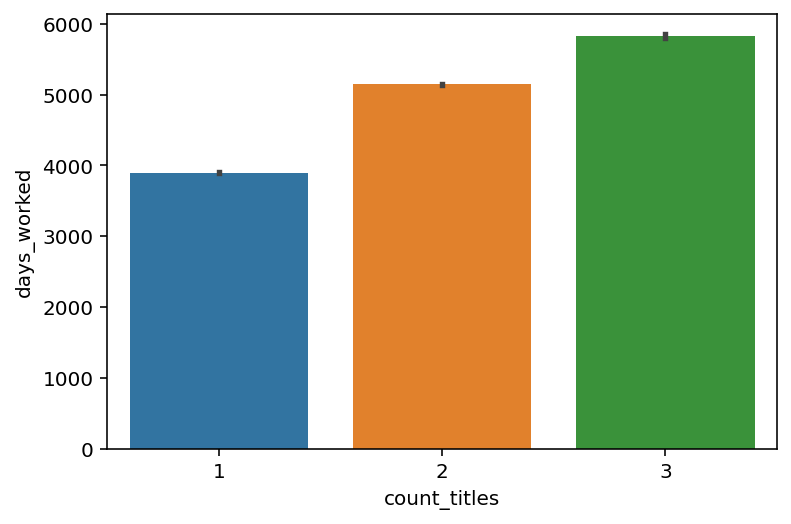

In [85]:
sns.barplot(data = emp_titles, y = 'days_worked', x = 'count_titles');

There is a relation between number of titles and days the employee work in the company

In [86]:
stats.pearsonr(emp_titles.count_titles, emp_titles.days_worked)

(0.3909142266416765, 0.0)

**Class solution**

 $H_0$: There is no linear relationship between employee tenure and their salary

$H_a$: There is a linear relationship between employee tenure and their salary

In [33]:
url = get_db_url('employees')

query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

employees_with_salaries = pd.read_sql(query, url)
employees_with_salaries

tenure  salary
0         4964   88958
1         5181   72527
2         4901   43311
3         4806   74057
4         3790   94692
...        ...     ...
240119    2572   52868
240120    3410   69501
240121    5030   83441
240122    2298   55003
240123     789   77303

[240124 rows x 2 columns]

In [34]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186078, 0.0)

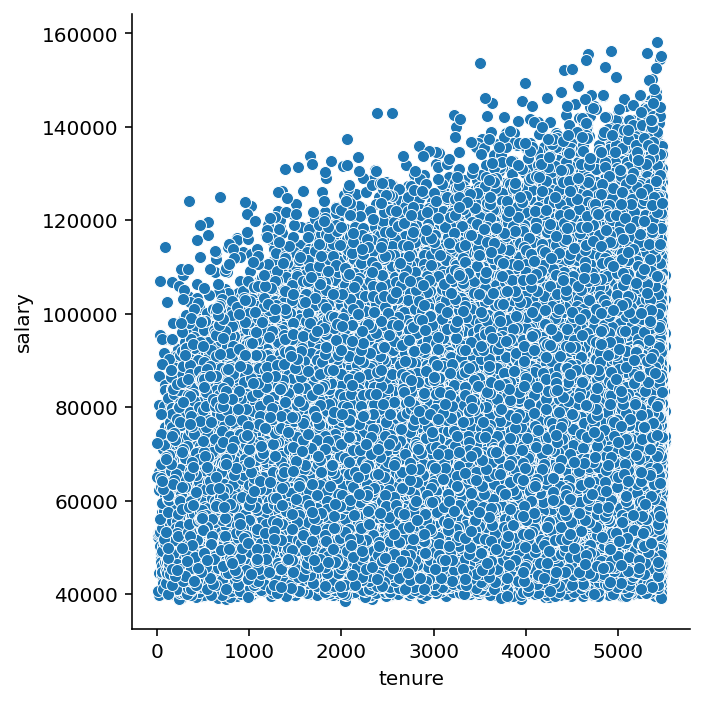

In [35]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure');

We can reject the null hypothesis, but the correlation is weak to moderate in the positive direction. Heteroscedasticity increases here as well, so if we took this correlation and used it as part of a linear regression for prediction, we would have a significant amount of potential error.

$H_0$: There's no linear relationship between employee tenure and number of titles

$H_a$: There's a linear relationship between employee tenure and number of titles

In [36]:
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

employees_with_titles = pd.read_sql(query, url)
employees_with_titles.head()

emp_no  tenure  n_titles
0   10001    4964         1
1   10002    5181         1
2   10003    4901         1
3   10004    4806         2
4   10005    3790         2

In [37]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.n_titles)

(0.2665989299136619, 0.0)

We reject the null hypothesis

4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [87]:
sleep_df = data('sleepstudy')
sleep_df.head()

Reaction  Days  Subject
1  249.5600     0      308
2  258.7047     1      308
3  250.8006     2      308
4  321.4398     3      308
5  356.8519     4      308

In [88]:
stats.pearsonr(sleep_df.Reaction, sleep_df.Days)

(0.5352302262650253, 9.894096322214812e-15)

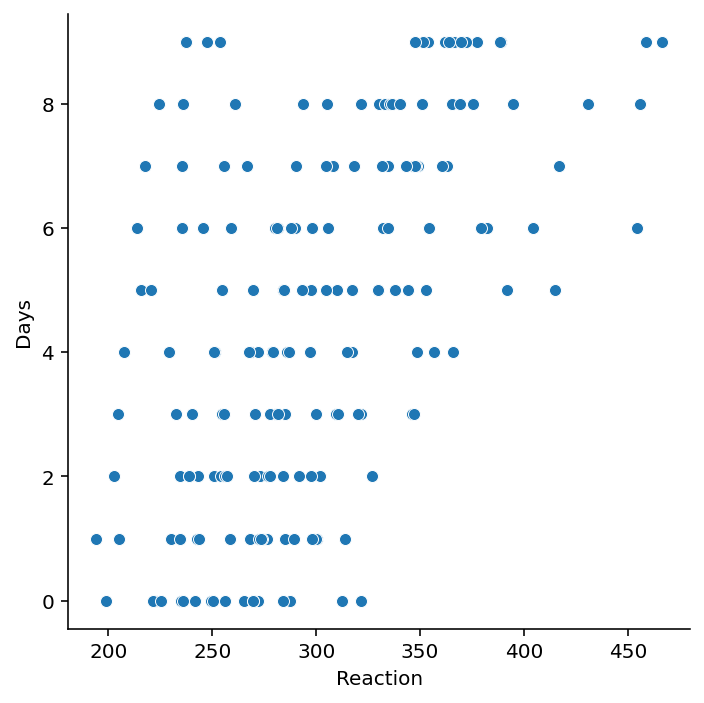

In [89]:
sns.relplot(data = sleep_df, x = 'Reaction', y = 'Days');

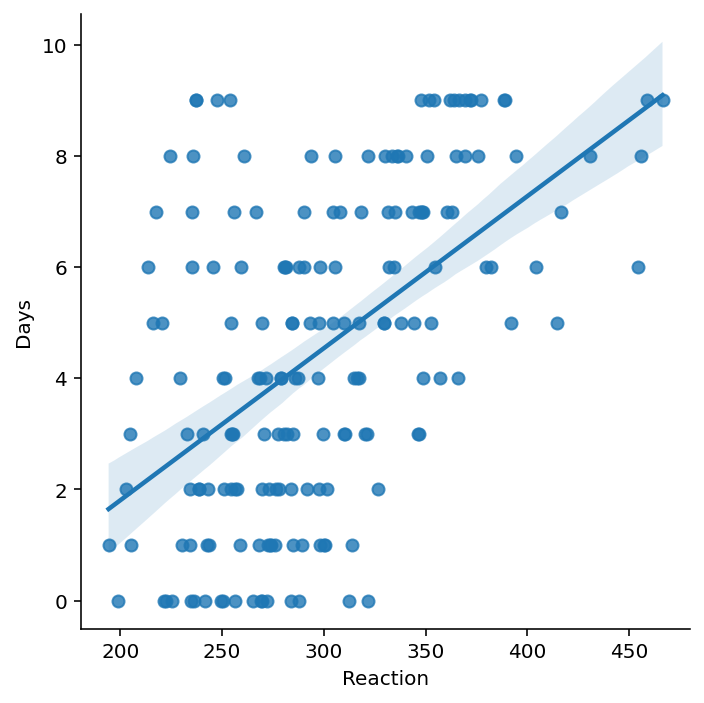

In [128]:
#class visualization 
sns.lmplot(data = sleep_df, x = 'Reaction', y = 'Days');

### Part 4 - $\chi^2$

1. **Answer with the type of stats test you would use (assume normal distribution):**

- Do students get better test grades if they have a rubber duck on their desk? - *2 sample 1 tailed T-test*
- Does smoking affect when or not someone has lung cancer? - *$\chi^2$ test
- Is gender independent of a person’s blood type? - *$\chi^2$ test*
- A farming company wants to know if a new fertilizer has improved crop yield or not - *1 sample 1 tailed T-test*
- Does the length of time of the lecture correlate with a students grade? - *Pearson R test*
- Do people with dogs live in apartments more than people with cats? - *2 sample 1 tailed T-test*

2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

||Codeup Student|Not Codeup Student|
|---|---|---|
|Uses a Macbook|	49|	20|
|Doesn't Use A Macbook|	1|	30|


$H_0$: There is no association between using Mac and being a Codeup student

$H_a$: There is association between using Mac and being a Codeup student

In [131]:
student_observe = pd.DataFrame({'Codeup_Student': [49, 1], 'Not_Codeup_Student' : [20, 30]}, index=['Uses_Mac', 'No_Mac'])
student_observe

Codeup_Student  Not_Codeup_Student
Uses_Mac              49                  20
No_Mac                 1                  30

In [133]:
chi, p, dfrd, expect = stats.chi2_contingency(student_observe)
chi, p, dfrd, expect

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [134]:
if p < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


3. Choose another 2 categorical variables from the mpg dataset and perform a contingency table test with them. Be sure to state your null and alternative hypotheses.

In [175]:
mpg = data('mpg')
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [137]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [136]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

$H_0$: There is no association between front/rear/4wd drive and type of transmission 

$H_a$: There is association between front/rear/4wd drive and type of transmission 

In [176]:
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [177]:
mpg['trans'] = np.where(mpg.trans.str.contains('auto'), 'auto', 'manual')
mpg.head()

manufacturer model  displ  year  cyl   trans drv  cty  hwy fl    class
1         audi    a4    1.8  1999    4    auto   f   18   29  p  compact
2         audi    a4    1.8  1999    4  manual   f   21   29  p  compact
3         audi    a4    2.0  2008    4  manual   f   20   31  p  compact
4         audi    a4    2.0  2008    4    auto   f   21   30  p  compact
5         audi    a4    2.8  1999    6    auto   f   16   26  p  compact

In [178]:
mpg_observed = pd.crosstab(mpg.trans, mpg.drv)
mpg_observed

drv      4   f   r
trans             
auto    75  65  17
manual  28  41   8

In [162]:
mpg_chi, mpg_p, mpg_df, mpg_expected = stats.chi2_contingency(mpg_observed)
mpg_chi, mpg_p, mpg_df, mpg_expected

(34.86379659284345,
 0.009832445265882013,
 18,
 array([[ 2.2008547 ,  2.26495726,  0.53418803],
        [ 0.88034188,  0.90598291,  0.21367521],
        [36.53418803, 37.5982906 ,  8.86752137],
        [17.16666667, 17.66666667,  4.16666667],
        [ 2.64102564,  2.71794872,  0.64102564],
        [ 1.32051282,  1.35897436,  0.32051282],
        [ 1.32051282,  1.35897436,  0.32051282],
        [ 7.04273504,  7.24786325,  1.70940171],
        [25.52991453, 26.27350427,  6.1965812 ],
        [ 8.36324786,  8.60683761,  2.02991453]]))

In [179]:
if mpg_p < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


There is association between front/rear/4wd drive and type of transmission 

4. Use the data from the employees database to answer these questions:

In [180]:
sql_chi_emp = '''
SELECT e.emp_no, e.gender, d.dept_name, dm.dept_no
FROM employees e
JOIN dept_emp de USING(emp_no)
JOIN departments d USING(dept_no)
LEFT JOIN dept_manager dm USING(emp_no)
WHERE de.to_date > NOW()
'''
#use url from previous exercise 

In [183]:
emp_df = pd.read_sql(sql_chi_emp, empl_url)

In [184]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   gender     240124 non-null  object
 2   dept_name  240124 non-null  object
 3   dept_no    24 non-null      object
dtypes: int64(1), object(3)
memory usage: 7.3+ MB


In [194]:
emp_df.dept_no.unique()

NoneType

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: There is no association between gender and sales or marketing department

$H_a$ : There is an association between gender and sales or marketing department

In [205]:
emp_df.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [207]:
sales_marketing = emp_df[(emp_df.dept_name == 'Sales') | (emp_df.dept_name == 'Marketing')]
sales_marketing.head()

emp_no gender  dept_name dept_no  was_manager
104290   10017      F  Marketing    None        False
104291   10058      M  Marketing    None        False
104292   10140      F  Marketing    None        False
104293   10228      F  Marketing    None        False
104294   10239      F  Marketing    None        False

In [210]:
sales_marketing_observed = pd.crosstab(sales_marketing.gender, sales_marketing.dept_name)
sales_marketing_observed

dept_name  Marketing  Sales
gender                     
F               5864  14999
M               8978  22702

In [211]:
chi_sm, p_sm, dfreed_sm, expected_sm = stats.chi2_contingency(sales_marketing_observed)
chi_sm, p_sm, dfreed_sm, expected_sm

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [212]:
if p_sm < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


There is no association between gender and sales or marketing department

- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: There is no association between gender and manager position

$H_a$: There is an association between gender and manager position

In [197]:
emp_df['was_manager'] = np.where(emp_df.dept_no.isnull(), False, True)
emp_df.head()

emp_no gender         dept_name dept_no  was_manager
0   10038      M  Customer Service    None        False
1   10049      F  Customer Service    None        False
2   10060      M  Customer Service    None        False
3   10088      F  Customer Service    None        False
4   10112      F  Customer Service    None        False

In [202]:
manager_observe = pd.crosstab(emp_df.gender, emp_df.was_manager)

In [203]:
chi_m, p_m, dfreed_m, expected_m =  stats.chi2_contingency(manager_observe)
chi_m, p_m, expected_m

(1.4644053674773516,
 0.22623047939647867,
 array([[9.60004040e+04, 9.59604204e+00],
        [1.44099596e+05, 1.44039580e+01]]))

In [204]:
if p_m < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


There is no association between gender and manager position